In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

from google.colab import drive

# Bibliotecas de pré-processamento
from sklearn.preprocessing import LabelEncoder

# Bibliotecas de plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.linear_model import RidgeClassifierCV, LogisticRegression, PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from pycaret.classification import *

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data/merged_df.csv')

In [5]:
df

,record_id,escolaridade,idade_diagnostico,sexo,raca,ultima_informacao_paciente,tempo_seguimento,ja_gravida,gestacao_idade,tempo_amamentacao,...,primeira_altura,primeiro_IMC,ultimo_peso,ultima_altura,ultimo_IMC,diferenca_peso,coef_peso,diferenca_tempo,coef_peso_tempo,idade_faixa
0,302,1.0,51.0,0.0,3.0,0.0,2225.0,1.0,21.0,23.0,...,158.0,23.153341,64.900000,158.000000,25.997436,7.100000,1.122837,1602.0,0.004432,"(50, 60]"
1,752,1.0,56.0,0.0,2.0,3.0,4153.0,1.0,29.0,39.0,...,152.0,36.357341,85.900000,152.000000,37.179709,1.900000,1.022619,1455.0,0.001306,"(50, 60]"
2,1589,2.0,42.0,0.0,4.0,3.0,3290.0,1.0,23.0,8.0,...,167.0,22.661264,63.650000,167.000000,22.822618,0.450000,1.007120,1616.0,0.000278,"(40, 50]"
3,1843,5.0,52.0,0.0,0.0,2.0,182.0,1.0,24.0,2.0,...,146.0,25.333083,60.200000,147.000000,27.858763,6.200000,1.114815,4626.0,0.001340,"(50, 60]"
4,1873,5.0,40.0,0.0,1.0,3.0,3234.0,1.0,28.0,57.0,...,148.0,26.479182,55.000000,150.000000,24.444444,-3.000000,0.948276,1341.0,-0.002237,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3171,78798,3.0,69.0,0.0,1.0,3.0,875.0,1.0,32.0,32.0,...,175.0,24.669388,62.741254,175.000000,20.486940,-8.146132,1.157190,752.0,0.000000,"(60, 70]"
3172,78802,5.0,60.0,0.0,1.0,3.0,859.0,1.0,22.0,20.0,...,153.0,31.184587,82.350000,153.000000,35.178777,9.350000,1.128082,2685.0,0.003482,"(50, 60]"
3173,78806,0.0,47.0,0.0,0.0,3.0,873.0,1.0,25.0,18.0,...,155.0,47.388137,43.984504,152.649448,18.875968,5.319810,0.920182,0.0,0.000000,"(40, 50]"
3174,78842,3.0,50.0,0.0,1.0,3.0,869.0,1.0,22.0,3.0,...,158.0,22.832879,57.000000,158.000000,22.832879,0.000000,1.000000,0.0,0.000000,"(40, 50]"


In [6]:
from sklearn.preprocessing import StandardScaler

df = df.drop(['record_id', 'idade_faixa'], axis=1)

X_afetam_eficacia = df[['idade_diagnostico','primeiro_IMC','ultima_informacao_paciente', 'tempo_seguimento', 'recidiva_distancia', 'recidiva_regional', 'recidiva_local']]
X_afetam_eficacia[['tempo_seguimento']] = StandardScaler().fit_transform(X_afetam_eficacia[['tempo_seguimento']])

In [7]:
km = KMeans( n_clusters = 2, init = 'random', max_iter = 300, n_init = 100, random_state = 52 )
km.fit( X_afetam_eficacia )
y_km = km.predict( X_afetam_eficacia )
df['eficacia_tratamento'] = y_km

In [8]:
print(len(df.query("idade_diagnostico > 80 and ultima_informacao_paciente == 3 and eficacia_tratamento == 0")))
print(len(df.query("idade_diagnostico > 80 and ultima_informacao_paciente == 3 and eficacia_tratamento == 1")))

# Este é um sistema de classificação de tratamento em que "0" significa que o tratamento foi bom e "1" significa 
# que foi ruim. Há dois casos apresentados: no primeiro, uma pessoa idosa de 80 anos sobreviveu ao tratamento, indicando 
# que ele foi bom. No segundo caso, não houve sobreviventes entre as pessoas mais velhas e, portanto, o tratamento foi classificado 
# como negativo para essa faixa etária. É importante lembrar que a eficácia do tratamento pode variar de acordo com vários fatores e 
# que cada caso é único.

0
38


In [9]:
df.query("idade_diagnostico < 30 and ultima_informacao_paciente == 0 and eficacia_tratamento == 1")

print(len(df.query("idade_diagnostico < 30 and ultima_informacao_paciente == 0 and eficacia_tratamento == 0")))
print(len(df.query("idade_diagnostico < 30 and ultima_informacao_paciente == 0 and eficacia_tratamento == 1")))

# Este modelo classifica o tratamento como bom (0) ou ruim (1). Ele foi testado em dois casos de mulheres com menos
# de 30 anos: uma morreu e a outra sobreviveu. O modelo foi capaz de classificar corretamente cada caso, indicando que 
# tem uma boa capacidade de classificação.

12
0


In [10]:
df = df.query("eficacia_tratamento == 0 and (tratamento == 0 or tratamento == 1)")[:]

In [11]:
import numpy as np

df = df.astype('float64')
df = df[np.isfinite(df).all(1)]

In [12]:
from pycaret.classification import *

clf = setup(data=df, 
            target='tratamento', 
            fix_imbalance=True,
            fix_imbalance_method='smote',
            numeric_imputation='median',
            fold_strategy='stratifiedkfold',
            fold=10,
            n_jobs=-1,
            log_experiment=False,
            experiment_name='clf-default-name')
best_model = compare_models()

,Description,Value
0,Session id,3119
1,Target,tratamento
2,Target type,Binary
3,Original data shape,"(1674, 60)"
4,Transformed data shape,"(1711, 60)"
5,Transformed train set shape,"(1208, 60)"
6,Transformed test set shape,"(503, 60)"
7,Numeric features,59
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6951,0.7499,0.6936,0.7081,0.6998,0.3901,0.3911,0.9430
lightgbm,Light Gradient Boosting Machine,0.6883,0.7345,0.6904,0.7008,0.6950,0.3764,0.3771,0.4520
et,Extra Trees Classifier,0.6866,0.7467,0.7067,0.6911,0.6973,0.3722,0.3738,0.5980
gbc,Gradient Boosting Classifier,0.6841,0.7472,0.6689,0.7019,0.6841,0.3687,0.3699,1.1020
lr,Logistic Regression,0.6840,0.7265,0.6770,0.7006,0.6877,0.3680,0.3692,1.2520
xgboost,Extreme Gradient Boosting,0.6789,0.7437,0.6737,0.6962,0.6836,0.3578,0.3594,0.9980
ada,Ada Boost Classifier,0.6772,0.7270,0.6788,0.6901,0.6841,0.3540,0.3544,0.4300
ridge,Ridge Classifier,0.6695,0.0000,0.6522,0.6905,0.6700,0.3394,0.3405,0.0910
lda,Linear Discriminant Analysis,0.6669,0.7308,0.6454,0.6893,0.6658,0.3344,0.3357,0.1230
nb,Naive Bayes,0.6627,0.7094,0.7299,0.6546,0.6891,0.3223,0.3263,0.1070


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

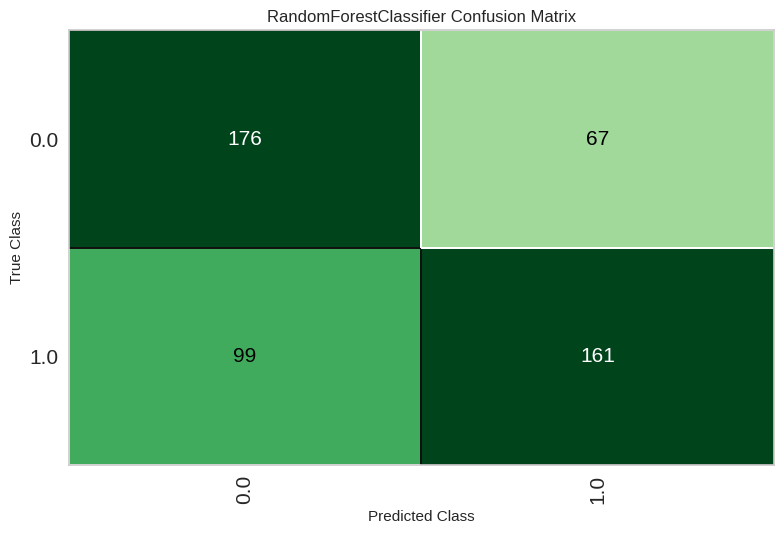

In [13]:
plot_model(best_model, plot = 'confusion_matrix')

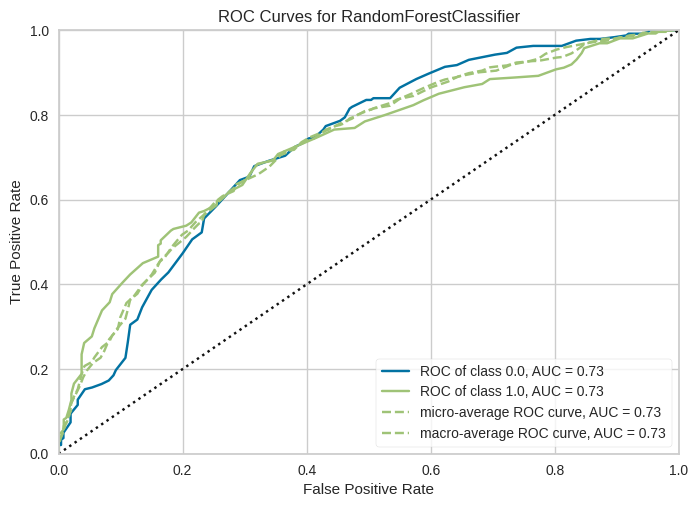

In [19]:
plot_model(best_model, plot = 'auc')

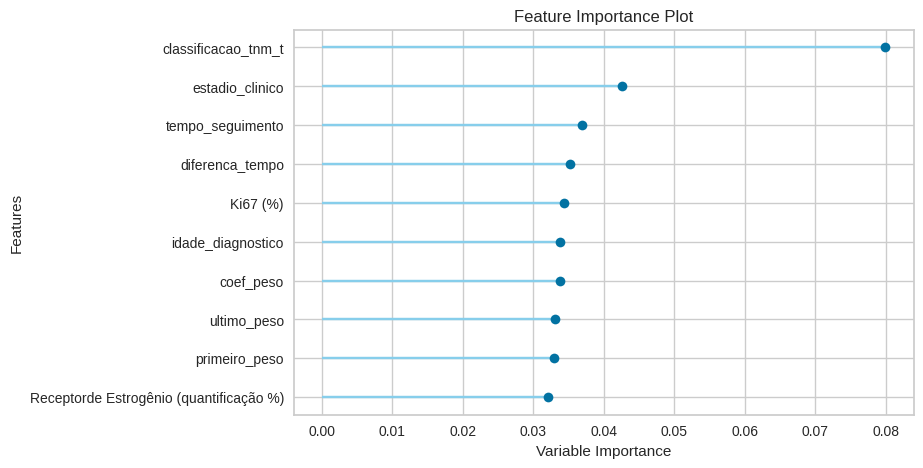

In [20]:
plot_model(best_model, plot = 'feature')

In [16]:
tuned_dt, tuner = tune_model(best_model, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7119,0.7829,0.6885,0.7368,0.7119,0.4244,0.4254
1,0.7436,0.7758,0.7541,0.7541,0.7541,0.4862,0.4862
2,0.7436,0.7854,0.7049,0.7818,0.7414,0.4885,0.4911
3,0.7350,0.7696,0.7049,0.7679,0.7350,0.4711,0.4728
4,0.6581,0.7930,0.6833,0.6613,0.6721,0.3152,0.3154
5,0.6325,0.6906,0.5500,0.6735,0.6055,0.2680,0.2728
6,0.7009,0.7535,0.6833,0.7193,0.7009,0.4021,0.4026
7,0.6154,0.6132,0.6167,0.6271,0.6218,0.2306,0.2306
8,0.6923,0.7693,0.7167,0.6935,0.7049,0.3837,0.3839


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

X = df.drop(['tratamento'], axis = 1)
y = df['tratamento']

rf = RandomForestClassifier(random_state=73)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X, y)

print("Melhores hiperparâmetros encontrados usando GridSearchCV:")
print(grid_search.best_params_)
print("Acurácia do modelo usando GridSearchCV:")
print(grid_search.best_score_)

random_search = RandomizedSearchCV(rf, param_distributions=param_grid, cv=5, n_iter=10, random_state=42, n_jobs=-1)

random_search.fit(X, y)

print("Melhores hiperparâmetros encontrados usando RandomizedSearchCV:")
print(random_search.best_params_)
print("Acurácia do modelo usando RandomizedSearchCV:")
print(random_search.best_score_)

In [ ]:
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

X = df.drop(['tratamento'], axis=1)
y = df['tratamento']

et = ExtraTreesClassifier(random_state=73)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],  
    'criterion': ['gini', 'entropy']  
}

grid_search = GridSearchCV(et, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

print("Melhores hiperparâmetros encontrados usando GridSearchCV:")
print(grid_search.best_params_)
print("Acurácia do modelo usando GridSearchCV:")
print(grid_search.best_score_)

random_search = RandomizedSearchCV(et, param_distributions=param_grid, cv=5, n_iter=10, random_state=42, n_jobs=-1)
random_search.fit(X, y)

print("Melhores hiperparâmetros encontrados usando RandomizedSearchCV:")
print(random_search.best_params_)
print("Acurácia do modelo usando RandomizedSearchCV:")
print(random_search.best_score_)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

X = df.drop(['tratamento'], axis=1)
y = df['tratamento']

gbc = GradientBoostingClassifier(random_state=73)

param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(gbc, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X, y)

print("Best hyperparameters found using GridSearchCV:")
print(grid_search.best_params_)
print("Model accuracy using GridSearchCV:")
print(grid_search.best_score_)

random_search = RandomizedSearchCV(gbc, param_distributions=param_grid, cv=5, n_iter=10, random_state=42, n_jobs=-1)

random_search.fit(X, y)

print("Best hyperparameters found using RandomizedSearchCV:")
print(random_search.best_params_)
print("Model accuracy using RandomizedSearchCV:")
print(random_search.best_score_)

In [21]:
save_model(tuned_dt, 'gbc_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['escolaridade',
                                              'idade_diagnostico', 'sexo',
                                              'raca',
                                              'ultima_informacao_paciente',
                                              'tempo_seguimento', 'ja_gravida',
                                              'gestacao_idade',
                                              'tempo_amamentacao',
                                              'grau_parentesco_mama_primeiro_1_vez',
                                              'grau_parentesco_mama_primeiro_mais_vezes',
                                              'gra...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight='balanced',
              

In [22]:
caminho_arquivo = '/content/drive/MyDrive/Data/merged_df2.csv'
df.to_csv(caminho_arquivo, index=False)